In [1]:
import os
import json
import openslide

import pandas
import numpy as np
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

import PySlide as pys

In [2]:
path = 'images/14.90610 C L2.11.json'
labels = {'GC':0}
file_type = 'json'
keys = ['GC']

In [3]:
ann=pys.Annotations(path, file_type)

In [4]:
annotations = ann.generate_annotations(labels)

### PySlide

In [5]:
slide = pys.Slide('images/14.90610 C L2.11.ndpi',border='draw',annotations=annotations)

In [6]:
slide.save('test.png',(2000,2000))

In [7]:
x = slide.slide_mask((2000,2000))

In [8]:
slide.save('masktest.png',(2000,2000), True)

######NEED TO CHECK WHY MASK IS SQUASHED#######

In [9]:
region, mask = slide.generate_region(mag=4, scale_border=True, factor=256)

x_size:768
y_size:768


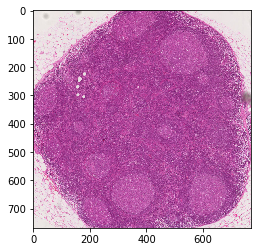

In [10]:
plt.imshow(region)

### Patching

In [11]:
patches = pys.Patching(slide, annotations)

In [12]:
import time

start_time = time.time()
print(patches.generate_patches(128, mode='focus'))
print("--- %s seconds ---" % (time.time() - start_time))

2104
--- 20.770353317260742 seconds ---


In [13]:
index=[i for i in range(len(patches._patches)) if patches._masks[i]['classes'] >1]

In [14]:
x = patches.extract_masks()

In [15]:
next

<generator object Patching.extract_masks at 0x114701850>

In [16]:
mask,x,y=next(x)

In [17]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [14]:
patches.save('data', mask=False)

TypeError: save() got an unexpected keyword argument 'mask'

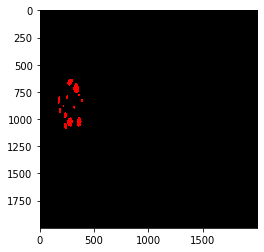

In [15]:
x = slide.slide_mask(size=(2000,2000))
plt.imshow(x)

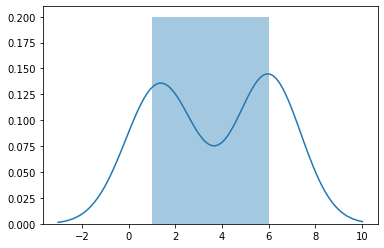

In [7]:
sns.distplot(labels)

In [6]:
labels=[1,1,1,1,1,2,2,2,6,6,6,6,6,6,6,6]